# Final Project Report

#### STATS 102 Introduction to Data Science Session 2, 2022 Fall

---

# Predicting House Prices in Beijing

- Yifei Yang (yy346@duke.edu)
- Jiayang Yu (jy332@duke.edu)
- Xiaoran Chen (xc189@duke.edu)

## 1 Introduction

Buyers, real estate agents, and policy makers can possibly use machine learning tools to help find the best price for the properties. We need machine learning models to solve the problem of house price prediction in order to identify the variables affecting house prices. To know the factors that affect house prices, we need to create regression models that quantitatively relates house prices with variables. We plan to build models to predict housing prices in Beijing using data from Kaggle (All the data was fetching from https://bj.lianjia.com/chengjiao.) which consist of features such as location(latitude and longtitude), trade time,renovation condition,etc., influencing the housing price differently. The final choice of machine learning models depends on the accuracy of the model, which means how well these variables can predict house prices. The ultimate goal of the project is to build a prediction engine capable of predicting the housing price by comparing several regression models and select the best with minimum errors. We found that RandomForestRegressor (RMSE:0.15) is the best model for this dataset.

## 2 Background 

An American online real estate market place Zillow has used data science in the real estate market. Zillow determines an estimator, also known as a “Zestimate” for a house, based on a range of publicly available information, including sales of comparable houses in a neighborhood.
Artificial intelligence can look at far more information, far more quickly, than a single human could when considering a fair price for a home, weighing factors like comparable home sales in an area, how many people are looking in a specific neighborhood and so on.
The Zestimate, facts you provided, and comparable homes nearby are used to calculate an estimated sale price.
If you’re looking up homes on Zillow’s website or app, the Zestimate is featured prominently in each listing, whether the home is for sale or not. If the house is currently for sale, a red dot is shown next to the words “House for sale,” and the Zestimate, if it’s available for that home, will appear on the same line.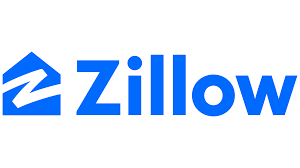

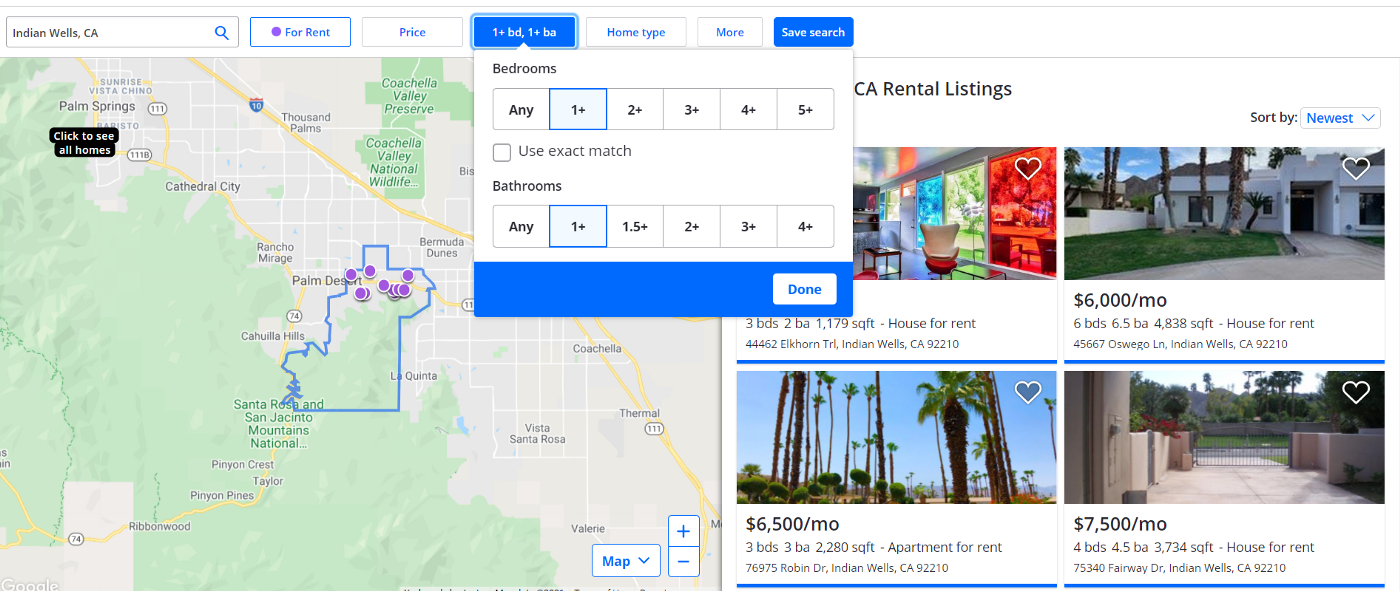

## 3 Design and Implementation


Data processing;
Data visualization;
Forward selection;
Model visualization;
Model evaluation and comparison

Import Essential Libraries, Metrics, load data

In [2]:
import warnings 
warnings.filterwarnings('ignore') 
import datetime as dt 
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 

import seaborn as sns
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score  
from sklearn.svm import SVR 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import Ridge 
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor

dataset=pd.read_csv('new.csv', parse_dates=['tradeTime'],encoding='gb2312')


print(dataset.head())
print(dataset.columns.values)

                                                 url            id  \
0  https://bj.lianjia.com/chengjiao/101084782030....  101084782030   
1  https://bj.lianjia.com/chengjiao/101086012217....  101086012217   
2  https://bj.lianjia.com/chengjiao/101086041636....  101086041636   
3  https://bj.lianjia.com/chengjiao/101086406841....  101086406841   
4  https://bj.lianjia.com/chengjiao/101086920653....  101086920653   

          Lng        Lat            Cid  tradeTime     DOM  followers  \
0  116.475489  40.019520  1111027376244 2016-08-09  1464.0        106   
1  116.453917  39.881534  1111027381879 2016-07-28   903.0        126   
2  116.561978  39.877145  1111040862969 2016-12-11  1271.0         48   
3  116.438010  40.076114  1111043185817 2016-09-30   965.0        138   
4  116.428392  39.886229  1111027381174 2016-08-28   927.0        286   

   totalPrice  price  ...  buildingType constructionTime renovationCondition  \
0       415.0  31680  ...           1.0             2005    

Our database is about Beijing’s housing prices and other related information, traded between 2011-2017.
Here are what the columns refer to in detail:
url: the url which fetches the data(character);
id: the id of transaction( character );
Lng&Lat: The abbreviation of Longitude and latitude, using the BD09 protocol. ( numerical ) It’s the commonly used coordinate systems for WEB maps, BD09 are only used in China;
Cid: community id( numerical );
tradeTime: the time of transaction( character );
DOM: active days on market( numerical );
totalPrice: the total price( numerical );
price: the average price by square( numerical );
buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 )( numerical );
constructionTime: the time of construction( numerical );
renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )( numerical );
buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).( numerical );
ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.( numerical )

In [3]:
dataset=dataset.drop(['url','id','Cid','fiveYearsProperty','floor','communityAverage','followers'],axis=1).dropna()
dataset=dataset.loc[dataset['constructionTime'] != '未知'] 
dataset=dataset.loc[dataset['buildingStructure'] != 'Unavailable']
dataset
print(dataset.head())

          Lng        Lat  tradeTime     DOM  totalPrice  price  square  \
0  116.475489  40.019520 2016-08-09  1464.0       415.0  31680  131.00   
1  116.453917  39.881534 2016-07-28   903.0       575.0  43436  132.38   
2  116.561978  39.877145 2016-12-11  1271.0      1030.0  52021  198.00   
3  116.438010  40.076114 2016-09-30   965.0       297.5  22202  134.00   
4  116.428392  39.886229 2016-08-28   927.0       392.0  48396   81.00   

  livingRoom drawingRoom  kitchen bathRoom  buildingType constructionTime  \
0          2           1        1        1           1.0             2005   
1          2           2        1        2           1.0             2004   
2          3           2        1        3           4.0             2005   
3          3           1        1        1           1.0             2008   
4          2           1        1        1           4.0             1960   

   renovationCondition  buildingStructure  ladderRatio  elevator  subway  \
0               

Since the url, id and other several columns cannot be features that count into the model, so we drop them, and dropna. For the construction time and buildingstructure, we select rows that are unavailable to drop them so that the left data are useful.

In [4]:
change_type={1:"Tower",2:"Bungalow",3:"Plate and Tower",4:"Plate"}
change_renovation={1:"Other",2:"Rough",3:"Simplicity",4:"Hardcover"}
change_structure={1:"Unavailable",2:"Mixed",3:"Brick and Wood",4:"Brick and Concrete",5:"Steel",6:"Steel and Concrete"}
change_elevator={1:"Present",0:"Absent"}
change_subway={1:"Nearby",0:"Far"}
change_district={ 1:"DongCheng",2:"FengTai",3:"DaXing",4:"FaXing",5:"FangShang",6:"ChangPing",7:"ChaoYang",8:"HaiDian",9:"ShiJingShan",10:"XiCheng",11:"TongZhou",12:"ShunYi",13:"MenTouGou"}
name_list=['buildingType', 'renovationCondition','buildingStructure','elevator','subway','district']
dataset['buildingType2']=dataset['buildingType'].map(change_type) # return a new iterator for retrieving the results.
dataset['renovation2']=dataset['renovationCondition'].map(change_renovation)
dataset['structure2']=dataset['buildingStructure'].map(change_structure)
dataset['elevator2']=dataset['elevator'].map(change_elevator)
dataset['subway2']=dataset['subway'].map(change_subway)
dataset
print(dataset.head())

          Lng        Lat  tradeTime     DOM  totalPrice  price  square  \
0  116.475489  40.019520 2016-08-09  1464.0       415.0  31680  131.00   
1  116.453917  39.881534 2016-07-28   903.0       575.0  43436  132.38   
2  116.561978  39.877145 2016-12-11  1271.0      1030.0  52021  198.00   
3  116.438010  40.076114 2016-09-30   965.0       297.5  22202  134.00   
4  116.428392  39.886229 2016-08-28   927.0       392.0  48396   81.00   

  livingRoom drawingRoom  kitchen  ... buildingStructure  ladderRatio  \
0          2           1        1  ...                 6        0.217   
1          2           2        1  ...                 6        0.667   
2          3           2        1  ...                 6        0.500   
3          3           1        1  ...                 6        0.273   
4          2           1        1  ...                 2        0.333   

  elevator  subway  district  buildingType2  renovation2          structure2  \
0      1.0     1.0         7        

To help us better understand the meaning which the numbers of certain columns refer to, we make the classification into words.

In [5]:
#add building age and room number
dataset['Building age'] = dataset['tradeTime'].dt.year.astype('float') - dataset['constructionTime'].astype('float')
dataset['Room number']=dataset['livingRoom'].astype('float')+dataset['drawingRoom'].astype('float')+dataset['kitchen'].astype('float')+dataset['bathRoom'].astype('float')
print(dataset.columns.values)

['Lng' 'Lat' 'tradeTime' 'DOM' 'totalPrice' 'price' 'square' 'livingRoom'
 'drawingRoom' 'kitchen' 'bathRoom' 'buildingType' 'constructionTime'
 'renovationCondition' 'buildingStructure' 'ladderRatio' 'elevator'
 'subway' 'district' 'buildingType2' 'renovation2' 'structure2'
 'elevator2' 'subway2' 'Building age' 'Room number']


Also, we use the existing data to generate two new columns as features for modeling. We subtract the construction time from the trade time to get the age of the house, and add up all the room type(e.g. living room/drawing room/kitchen and bathroom) as the room number.

In [6]:
dataset=dataset.sort_values(by='tradeTime')
dataset.index=dataset['tradeTime']
dataset=dataset['2016':'2016']#use 2016 as the time period to make prediction
dataset 
print(dataset.head())
print(dataset.tail())

                   Lng        Lat  tradeTime  DOM  totalPrice  price  square  \
tradeTime                                                                      
2016-01-01  116.508181  39.807662 2016-01-01  1.0        94.0  17723   53.04   
2016-01-01  116.280601  40.037442 2016-01-01  1.0       413.0  43584   94.76   
2016-01-01  116.472175  40.017522 2016-01-01  1.0       411.0  41109   99.98   
2016-01-01  116.162938  39.939005 2016-01-01  1.0       195.0  24653   79.10   
2016-01-01  116.329601  39.974019 2016-01-01  1.0       383.0  65214   58.73   

           livingRoom drawingRoom  kitchen  ... elevator  subway district  \
tradeTime                                   ...                             
2016-01-01          1           1        1  ...      1.0     1.0        3   
2016-01-01          3           1        1  ...      0.0     1.0        8   
2016-01-01          2           2        1  ...      1.0     1.0        7   
2016-01-01          2           1        1  ...      1

We sort the dataset by tradetime in ascending order, picking up the trade-in-2016 data and print the first five rows and last five rows to have a check.

Time Sequence

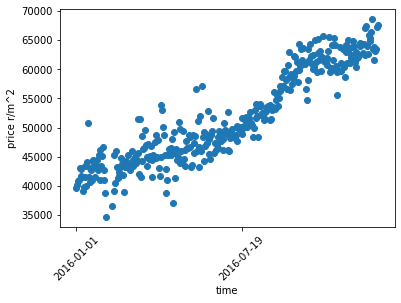

In [7]:
time_price=pd.DataFrame()
time_price['price']=dataset['price']
time_price.index=dataset['tradeTime'].astype('datetime64[ns]')
time_price=time_price.resample('D').mean().to_period('D')
time_price.to_csv('time_price.csv')
x_num=list(range(len(time_price.index)))
y=time_price['price']
plt.xticks(x_num[::200],time_price.index[::200],rotation=45)
plt.xlabel('time')
plt.ylabel('price r/m^2')
plt.scatter(x_num,y)

we can see that the house prices in Beijing basically keep rising in 2016.

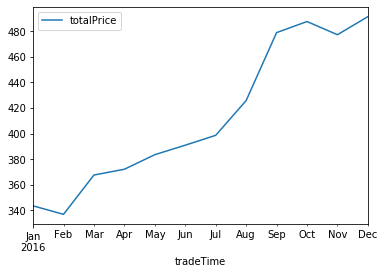

In [8]:
price_by_trade_time = pd.DataFrame()
price_by_trade_time['totalPrice'] = dataset['totalPrice']
price_by_trade_time.index = dataset['tradeTime'].astype('datetime64[ns]')
price_by_trade_month = price_by_trade_time.resample('M').mean().to_period('M').fillna(0)
price_by_trade_month.plot(kind='line')
plt.show()

Distriction

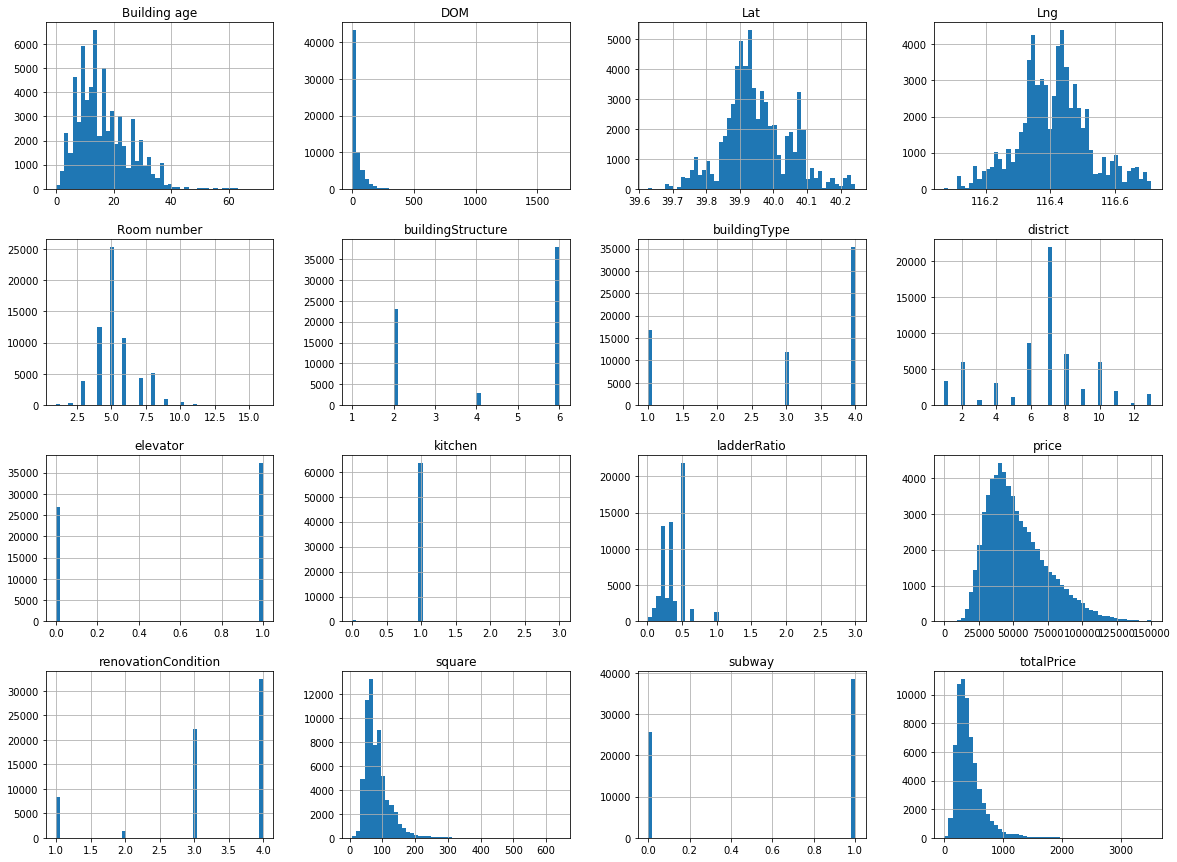

In [9]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

The plots above show the distributionof each variable. The Y axis represents the number of data falling in each horizontal axis interval.

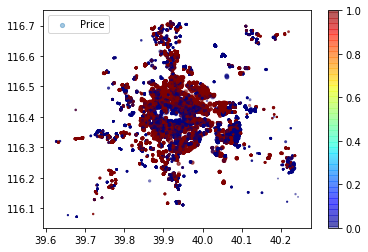

In [10]:
fig = plt.scatter(x=dataset['Lat'], y=dataset['Lng'], alpha=0.4, \
    s=dataset['totalPrice']/100, label='Price', \
    c=dataset['elevator'], cmap=plt.get_cmap('jet'))
plt.colorbar(fig)
plt.legend()
plt.show()

Overall the red dots are bigger than the blue ones, which mean that elevators really help improve the house price. Another finding is that the houses we have in our dataset are mostly at the center of Beijing.

Boxplot

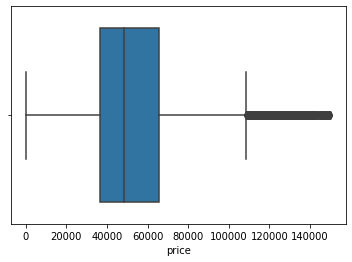

In [12]:
# box plot of the concentrated price range
sns.boxplot(dataset['price'])

We can see that the average price is about 50000 yuan/square meter. And most data are between 40000 and 60000 yuan.

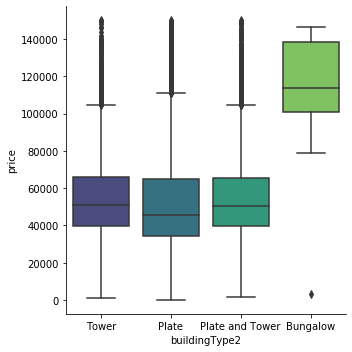

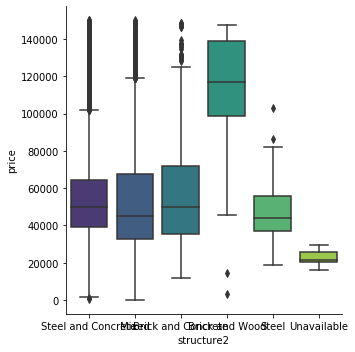

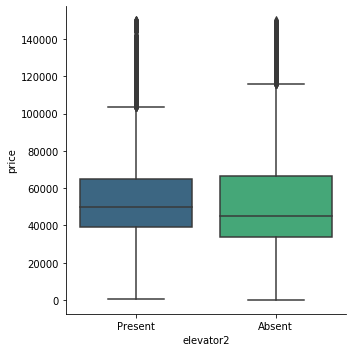

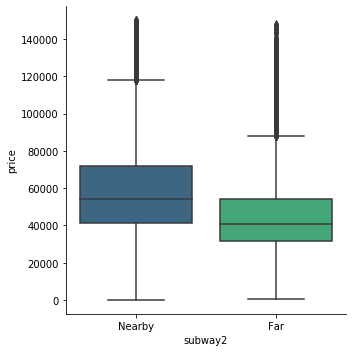

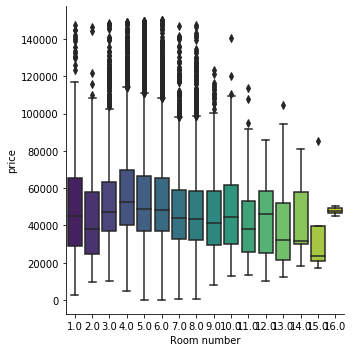

In [13]:
x_name = ['buildingType2', 'structure2', 'elevator2', 'subway2','Room number']
for i in x_name:
    k=sns.catplot(x=i, y='price', kind="box", data=dataset,palette="viridis")

Building Type: the price of Bungalow is much higher than the other three.
Structure: the price of Brick and wood is higher than others.
Elevator: the houses with elevator is more expensive than those don't have elevators.
Subway: the houses with subway nearby are more expensive than those with subway far away.

building type-place

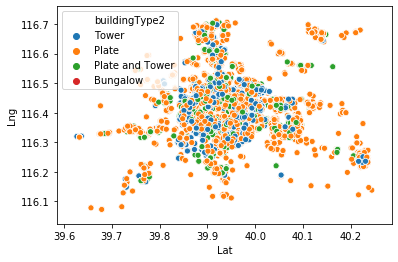

In [14]:
sns.scatterplot(dataset['Lat'],dataset['Lng'],hue=dataset['buildingType2'])

We find that towers are generally at the center of Beijing while plates are all over the city.

elevator-place

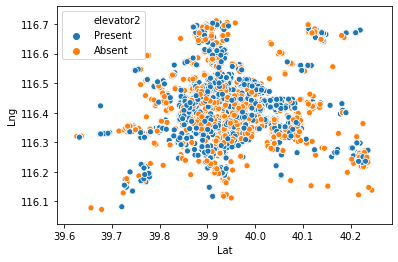

In [15]:
sns.scatterplot(dataset['Lat'],dataset['Lng'],hue=dataset['elevator2'])

The distribution of elevators seems more random because there seems no big regional difference.

In [16]:
#forward Bagging
dataset['elevator'] = dataset['elevator'].astype('int')
dataset['subway'] = dataset['subway'].astype('int')
from sklearn.model_selection import cross_validate
dataset.dropna(inplace=True)
opt_mods = []
opt_features = []
# ------STEP1--------
#
# 3.1. Null model
# ----------------- #
mod = BaggingRegressor().fit(np.ones([dataset.shape[0],1]), dataset['price'])
opt_mods.append(mod)
opt_features.append([])

# ----------------- #
#
# ------STEP2--------
#
# 3.2. Search for the optimal 
# models for different numbers of features
# ----------------- #
# 3.2.1. We search for optimal model with k features
# through adding a feature to the optimal model with k-1 features

for k in range(1, dataset.shape[1]):
    mk_rss = np.inf
    mk_mod = None
    mk_features = None
    
    # 3.2.1.1. scan all the features 
    # not in the optimal model with k-1 features.
    # NOTE: we append feature to the list, so the last element
    # in opt_features will be fore model k-1.
    mk_1_features = opt_features[-1]
    candidate_features = set(dataset.columns)- set(['price'])-set(['totalPrice'])-set(['buildingType2'])-set(['renovation2'])-set(['structure2'])-set(['elevator2'])-set(['subway2'])-set(['tradeTime'])
    candidate_features=list(candidate_features)
    t=candidate_features[0]
    candidate_features[0]=candidate_features[-1]
    candidate_features[-1]=t
    
    for i in candidate_features:
        # Add feature i
        mk_1_features_pi = mk_1_features + [i]
        
        # Train the model
        mod = BaggingRegressor().fit(dataset[mk_1_features_pi], dataset['price'])
        
        # Calculate RSS for training data
        y_pred = mod.predict(dataset[mk_1_features_pi])
        rss = sum((dataset['price'] - y_pred)**2)
        
        # Document the one with smallest rss
        if rss < mk_rss:
            mk_rss = rss
            mk_mod = mod
            mk_features = mk_1_features_pi
        
        
    # 3.2.1.2. Save optimal model with k features
    opt_mods.append(mk_mod)
    opt_features.append(mk_features)

# ----------------- #
#
# ------STEP3--------
#
# 3.3. Get the single optimal
single_opt_mod_score = -np.inf
opt_mod_idx = 0
for i in range(1, len(opt_mods)):
    # 3.3.1. Cross-validation
    scores = cross_validate(opt_mods[i], dataset[opt_features[i]], dataset['price'], scoring='r2', cv=5)
    scores_mean = scores['test_score'].mean()
    print(scores_mean)
    
    # 3.3.2. Document the sinle optimal model
    if scores_mean > single_opt_mod_score:
        single_opt_mod_score = scores_mean
        opt_mod_idx = i

# Output the features
print(opt_features[opt_mod_idx])

0.7048179902374013
0.6448157895382156
0.5426738011423683
0.7808650103554081
0.786588556408067
0.7896829921431241
0.790400070360647
0.7910205535193301
0.7919328603763995
0.7926142398673733
0.7911595073510229
0.7917122837476869
0.7935340455188935
0.7930076074229138
0.7921005882686958
0.7929415169880698
0.7932768833265564
0.7921487427639036
0.7929666350905442
0.7924677526121193
0.7926285332925005
0.7915391149999291
0.7923055955247024
0.7923358903185987
0.7918031193592528
['Lat', 'DOM', 'square', 'Lng', 'constructionTime', 'renovationCondition', 'ladderRatio', 'bathRoom', 'buildingType', 'elevator', 'Room number', 'district', 'elevator']


In [17]:
# the most relevant parameter
# x(Independent variables) and y(target variables) 
X=dataset[['Lat','DOM','Building age','Lng','square','ladderRatio', 'renovationCondition', 'drawingRoom', 'livingRoom','subway','drawingRoom','district']]
Y=dataset['price']
#Splitting the data into train,test data 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
print(x_train)
print(y_train)

                  Lat   DOM  Building age         Lng  square  ladderRatio  \
tradeTime                                                                    
2016-07-06  40.031531   6.0          17.0  116.636725   77.81        0.500   
2016-06-28  39.992542  79.0          18.0  116.469190   75.51        0.250   
2016-08-21  39.967942  63.0          13.0  116.378800  102.38        0.500   
2016-08-11  39.928019  13.0          12.0  116.594801  143.37        0.333   
2016-08-12  40.012518   3.0           9.0  116.377737   46.80        0.154   
...               ...   ...           ...         ...     ...          ...   
2016-08-13  39.853078   8.0           7.0  116.568799  157.76        0.667   
2016-02-27  39.945052   1.0          32.0  116.455926   54.02        0.500   
2016-04-14  39.862880   1.0          10.0  116.345810   84.92        0.250   
2016-08-15  39.855240  44.0           7.0  116.448320  159.11        1.000   
2016-12-25  39.922354  55.0          31.0  116.442322   39.00   

# Models

After feature selection, we are going to conduct the predictive analysis by modeling.

# DecisionTreeRegressor

{'MSE': 0.03810052516993724, 'MAE': 0.14092077356143157, 'RMSE': 0.19519355821834194}


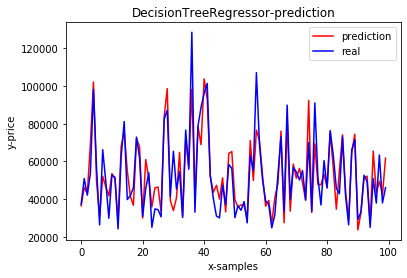

In [18]:
from sklearn.preprocessing import StandardScaler
y_predict = None
evl_dict = {}
DecisionTreeRegressor_model = DecisionTreeRegressor()

# data preprocessing
# fit(data) method is used to compute the mean and std dev to be used further for scaling
# transform(data) method to Perform standardization by centering and scaling. 
ss_X = StandardScaler()  
x_train = ss_X.ransform(x_fit_ttrain)  # fit_transform() method does both fits and transform, Fit to data, then transform it        
x_test  = ss_X.transform(x_test) # only do the transformation part

# training
DecisionTreeRegressor_model.fit(x_train, y_train)

# predicting
y_predict = DecisionTreeRegressor_model.predict(x_test)

# test the accuracy of the models
def evaluation(DecisionTreeRegressor_model):
    MSE = mean_squared_error(y_test,y_predict)/(y_test.mean()*y_predict.mean()) 
    MAE = (mean_absolute_error(y_test,y_predict))/(y_test.mean()) 
    RMSE = np.sqrt((mean_squared_error(y_test, y_predict))/(y_test.mean()*y_predict.mean())) 
    
    evl_dict = {"MSE":MSE,"MAE":MAE,"RMSE":RMSE}
    return evl_dict

# visualization
# We select the first hundred samples in the prediction result dataset & testing dataset, 
# Then we plot the real line in blue, and the prediction line in red. 

def visualAnalysis(DecisionTreeRegressor_model):
              y_test_new = y_test.reset_index(drop = True)
              plt.plot(y_predict[:100],c='r',label='prediction')
              plt.plot(y_test_new[:100],c='b',label='real')
              plt.xlabel('x-samples')
              plt.ylabel('y-price')
              plt.legend()
              plt.savefig("DecisionTreeRegressor")
              plt.title("DecisionTreeRegressor"+'-'+'prediction')

evaluation(DecisionTreeRegressor_model)
print(evaluation(DecisionTreeRegressor_model))

visualAnalysis(DecisionTreeRegressor_model)

Then we apply the same approach into different regression models like linear regression, rf, ridge regressor,etc.

# LinearRegression

{'MSE': 0.1394252052289666, 'MAE': 0.29068451845686016, 'RMSE': 0.37339684683854335}


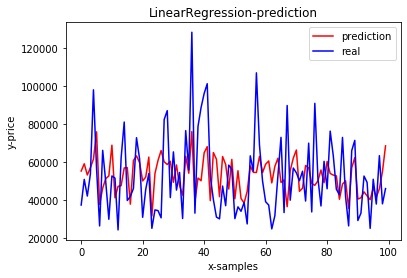

In [19]:

from sklearn.preprocessing import StandardScaler
y_predict = None
evl_dict = {}
linear_model = LinearRegression()

ss_X = StandardScaler()  
x_train = ss_X.fit_transform(x_train)            
x_test  = ss_X.transform(x_test)

linear_model.fit(x_train, y_train)

y_predict = linear_model.predict(x_test)

def evaluation(linear_model):
    MSE = mean_squared_error(y_test,y_predict)/(y_test.mean()*y_predict.mean()) 
    MAE = (mean_absolute_error(y_test,y_predict))/(y_test.mean()) 
    RMSE = np.sqrt((mean_squared_error(y_test, y_predict))/(y_test.mean()*y_predict.mean())) 
    
    evl_dict = {"MSE":MSE,"MAE":MAE,"RMSE":RMSE}
    return evl_dict
def visualAnalysis(linear_model):
              y_test_new = y_test.reset_index(drop = True)
              plt.plot(y_predict[:100],c='r',label='prediction')
              plt.plot(y_test_new[:100],c='b',label='real')
              plt.xlabel('x-samples')
              plt.ylabel('y-price')
              plt.legend()
              plt.savefig("LinearRegression")
              plt.title("LinearRegression"+'-'+'prediction')

evaluation(linear_model)
print(evaluation(linear_model))

visualAnalysis(linear_model)

# RandomForestRegressor

{'MSE': 0.02217149050525534, 'MAE': 0.10886606504234475, 'RMSE': 0.14890094192198833}


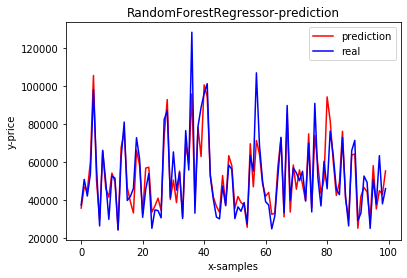

In [20]:

from sklearn.preprocessing import StandardScaler
y_predict = None
evl_dict = {}
RandomForestRegressor_model = RandomForestRegressor()

ss_X = StandardScaler()  
x_train = ss_X.fit_transform(x_train)            
x_test  = ss_X.transform(x_test)


RandomForestRegressor_model.fit(x_train, y_train)

y_predict = RandomForestRegressor_model.predict(x_test)

def evaluation(RandomForestRegressor_model):
    MSE = mean_squared_error(y_test,y_predict)/(y_test.mean()*y_predict.mean()) 
    MAE = (mean_absolute_error(y_test,y_predict))/(y_test.mean()) 
    RMSE = np.sqrt((mean_squared_error(y_test, y_predict))/(y_test.mean()*y_predict.mean())) 
     
    evl_dict = {"MSE":MSE,"MAE":MAE,"RMSE":RMSE}
    return evl_dict
def visualAnalysis(RandomForestRegressor_model):
              y_test_new = y_test.reset_index(drop = True)
              plt.plot(y_predict[:100],c='r',label='prediction')
              plt.plot(y_test_new[:100],c='b',label='real')
              plt.xlabel('x-samples')
              plt.ylabel('y-price')
              plt.legend()
              plt.savefig("RandomForestRegressor")
              plt.title("RandomForestRegressor"+'-'+'prediction')

evaluation(RandomForestRegressor_model)
print(evaluation(RandomForestRegressor_model))
visualAnalysis(RandomForestRegressor_model)

# RidgeRegression

{'MSE': 0.13942517942902813, 'MAE': 0.2906845931227855, 'RMSE': 0.37339681229093014}


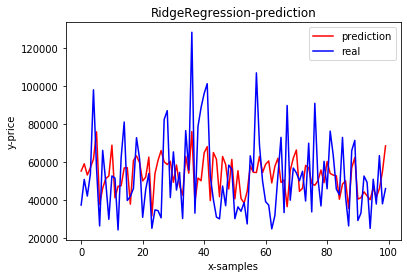

In [21]:

from sklearn.preprocessing import StandardScaler
y_predict = None
evl_dict = {}
RidgeRegression_model = Ridge()

ss_X = StandardScaler()  
x_train = ss_X.fit_transform(x_train)            
x_test  = ss_X.transform(x_test)


RidgeRegression_model.fit(x_train, y_train)

y_predict = RidgeRegression_model.predict(x_test)

def evaluation(RidgeRegression_model):
    MSE = mean_squared_error(y_test,y_predict)/(y_test.mean()*y_predict.mean()) 
    MAE = (mean_absolute_error(y_test,y_predict))/(y_test.mean()) 
    RMSE = np.sqrt((mean_squared_error(y_test, y_predict))/(y_test.mean()*y_predict.mean())) 
    
    evl_dict = {"MSE":MSE,"MAE":MAE,"RMSE":RMSE}
    return evl_dict
def visualAnalysis(RidgeRegression_model):
              y_test_new = y_test.reset_index(drop = True)
              plt.plot(y_predict[:100],c='r',label='prediction')
              plt.plot(y_test_new[:100],c='b',label='real')
              plt.xlabel('x-samples')
              plt.ylabel('y-price')
              plt.legend()
              plt.savefig("RidgeRegression")
              plt.title("RidgeRegression"+'-'+'prediction')

evaluation(RidgeRegression_model)
print(evaluation(RidgeRegression_model))
visualAnalysis(RidgeRegression_model)

# LassoRegression

{'MSE': 0.13942523502093512, 'MAE': 0.2906864974355341, 'RMSE': 0.37339688673171223}


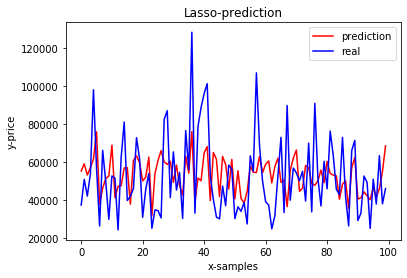

In [22]:

from sklearn.preprocessing import StandardScaler
y_predict = None
evl_dict = {}
Lasso_model = Lasso()

ss_X = StandardScaler()  
x_train = ss_X.fit_transform(x_train)            
x_test  = ss_X.transform(x_test)


Lasso_model.fit(x_train, y_train)

y_predict = Lasso_model.predict(x_test)

def evaluation(Lasso_model):
    MSE = mean_squared_error(y_test,y_predict)/(y_test.mean()*y_predict.mean()) 
    MAE = (mean_absolute_error(y_test,y_predict))/(y_test.mean()) 
    RMSE = np.sqrt((mean_squared_error(y_test, y_predict))/(y_test.mean()*y_predict.mean())) 
    
    evl_dict = {"MSE":MSE,"MAE":MAE,"RMSE":RMSE}
    return evl_dict
def visualAnalysis(Lasso_model):
              y_test_new = y_test.reset_index(drop = True)
              plt.plot(y_predict[:100],c='r',label='prediction')
              plt.plot(y_test_new[:100],c='b',label='real')
              plt.xlabel('x-samples')
              plt.ylabel('y-price')
              plt.legend()
              plt.savefig("Lasso")
              plt.title("Lasso"+'-'+'prediction')

evaluation(Lasso_model)
print(evaluation(Lasso_model))
visualAnalysis(Lasso_model)

# BaggingRegressor

{'MSE': 0.024117367778193642, 'MAE': 0.11332062774568498, 'RMSE': 0.1552976747353084}


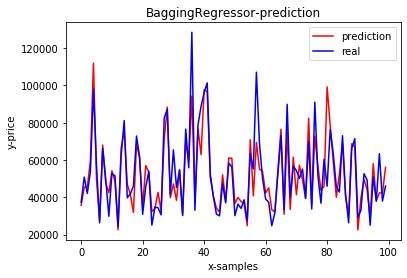

In [23]:

from sklearn.preprocessing import StandardScaler
y_predict = None
evl_dict = {}
BaggingRegressor_model = BaggingRegressor()

ss_X = StandardScaler()  
x_train = ss_X.fit_transform(x_train)            
x_test  = ss_X.transform(x_test)


BaggingRegressor_model.fit(x_train, y_train)

y_predict = BaggingRegressor_model.predict(x_test)

def evaluation(BaggingRegressor_model):
    MSE = mean_squared_error(y_test,y_predict)/(y_test.mean()*y_predict.mean()) 
    MAE = (mean_absolute_error(y_test,y_predict))/(y_test.mean()) 
    RMSE = np.sqrt((mean_squared_error(y_test, y_predict))/(y_test.mean()*y_predict.mean())) 
     
    evl_dict = {"MSE":MSE,"MAE":MAE,"RMSE":RMSE}
    return evl_dict
def visualAnalysis(BaggingRegressor_model):
              y_test_new = y_test.reset_index(drop = True)
              plt.plot(y_predict[:100],c='r',label='prediction')
              plt.plot(y_test_new[:100],c='b',label='real')
              plt.xlabel('x-samples')
              plt.ylabel('y-price')
              plt.legend()
              plt.savefig("BaggingRegressor")
              plt.title("BaggingRegressor"+'-'+'prediction')

evaluation(BaggingRegressor_model)
print(evaluation(BaggingRegressor_model))
visualAnalysis(BaggingRegressor_model)

# AdaBoostRegressor

{'MSE': 0.06387660235200453, 'MAE': 0.2138101447510924, 'RMSE': 0.25273820912557826}


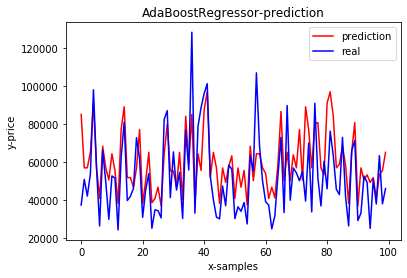

In [24]:

from sklearn.preprocessing import StandardScaler
y_predict = None
evl_dict = {}
AdaBoostRegressor_model = AdaBoostRegressor()

ss_X = StandardScaler()  
x_train = ss_X.fit_transform(x_train)            
x_test  = ss_X.transform(x_test)


AdaBoostRegressor_model.fit(x_train, y_train)

y_predict = AdaBoostRegressor_model.predict(x_test)

def evaluation(AdaBoostRegressor_model):
    MSE = mean_squared_error(y_test,y_predict)/(y_test.mean()*y_predict.mean()) 
    MAE = (mean_absolute_error(y_test,y_predict))/(y_test.mean()) 
    RMSE = np.sqrt((mean_squared_error(y_test, y_predict))/(y_test.mean()*y_predict.mean())) 
    
    evl_dict = {"MSE":MSE,"MAE":MAE,"RMSE":RMSE}
    return evl_dict
def visualAnalysis(AdaBoostRegressor_model):
              y_test_new = y_test.reset_index(drop = True)
              plt.plot(y_predict[:100],c='r',label='prediction')
              plt.plot(y_test_new[:100],c='b',label='real')
              plt.xlabel('x-samples')
              plt.ylabel('y-price')
              plt.legend()
              plt.savefig("AdaBoostRegressor")
              plt.title("AdaBoostRegressor"+'-'+'prediction')

evaluation(AdaBoostRegressor_model)
print(evaluation(AdaBoostRegressor_model))
visualAnalysis(AdaBoostRegressor_model)

# MLPRegressor

{'MSE': 0.12912465143895585, 'MAE': 0.2773830200372923, 'RMSE': 0.35933918717411806}


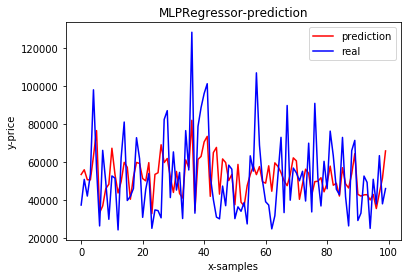

In [25]:
from sklearn.preprocessing import StandardScaler
y_predict = None
evl_dict = {}
MLPRegressor_model = MLPRegressor()

ss_X = StandardScaler()  
x_train = ss_X.fit_transform(x_train)            
x_test  = ss_X.transform(x_test)


MLPRegressor_model.fit(x_train, y_train)

y_predict = MLPRegressor_model.predict(x_test)

def evaluation(MLPRegressor_model):
    MSE = mean_squared_error(y_test,y_predict)/(y_test.mean()*y_predict.mean()) 
    MAE = (mean_absolute_error(y_test,y_predict))/(y_test.mean()) 
    RMSE = np.sqrt((mean_squared_error(y_test, y_predict))/(y_test.mean()*y_predict.mean())) 
    
    evl_dict = {"MSE":MSE,"MAE":MAE,"RMSE":RMSE}
    return evl_dict
def visualAnalysis(MLPRegressor_model):
              y_test_new = y_test.reset_index(drop = True)
              plt.plot(y_predict[:100],c='r',label='prediction')
              plt.plot(y_test_new[:100],c='b',label='real')
              plt.xlabel('x-samples')
              plt.ylabel('y-price')
              plt.legend()
              plt.savefig("MLPRegressor")
              plt.title("MLPRegressor"+'-'+'prediction')

evaluation(MLPRegressor_model)
print(evaluation(MLPRegressor_model))
visualAnalysis(MLPRegressor_model)

# SVR

{'MSE': 0.1903603355962333, 'MAE': 0.31436503969211466, 'RMSE': 0.43630303184396196}


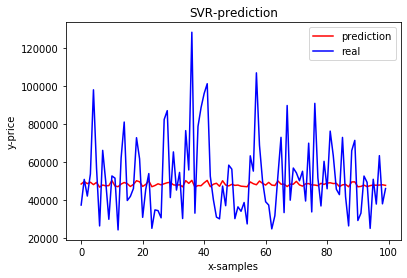

In [26]:
from sklearn.preprocessing import StandardScaler
y_predict = None
evl_dict = {}
SVR_model = SVR()

ss_X = StandardScaler()  
x_train = ss_X.fit_transform(x_train)            
x_test  = ss_X.transform(x_test)


SVR_model.fit(x_train, y_train)

y_predict = SVR_model.predict(x_test)

def evaluation(SVR_model):
    MSE = mean_squared_error(y_test,y_predict)/(y_test.mean()*y_predict.mean()) 
    MAE = (mean_absolute_error(y_test,y_predict))/(y_test.mean()) 
    RMSE = np.sqrt((mean_squared_error(y_test, y_predict))/(y_test.mean()*y_predict.mean())) 
    
    evl_dict = {"MSE":MSE,"MAE":MAE,"RMSE":RMSE}
    return evl_dict
def visualAnalysis(SVR_model):
              y_test_new = y_test.reset_index(drop = True)
              plt.plot(y_predict[:100],c='r',label='prediction')
              plt.plot(y_test_new[:100],c='b',label='real')
              plt.xlabel('x-samples')
              plt.ylabel('y-price')
              plt.legend()
              plt.savefig("SVR")
              plt.title("SVR"+'-'+'prediction')

evaluation(SVR_model)
print(evaluation(SVR_model))
visualAnalysis(SVR_model)

## 4 Results -- Model Comparison

Random forest regressor is reliable and sufficient that has minimum errors among the three metrics (for instance, with RMSE down to 0.15). As for the Decision tree regressor, the prediction also fits the real data well, while the linear regression and SVR have relatively worse performance. 

      Model       MSE       MAE      RMSE
0    Linear  0.139425  0.290685  0.373397
1       DTR  0.038101  0.140921  0.195194
2       RFR  0.022171  0.108866  0.148901
3     Ridge  0.139425  0.290685  0.373397
4     Lasso  0.139425  0.290686  0.373397
5   Bagging  0.024117  0.113321  0.155298
6  AdaBoost  0.063877  0.213810  0.252738
7       MLP  0.129125  0.277383  0.359339
8       SVR  0.190360  0.314365  0.436303


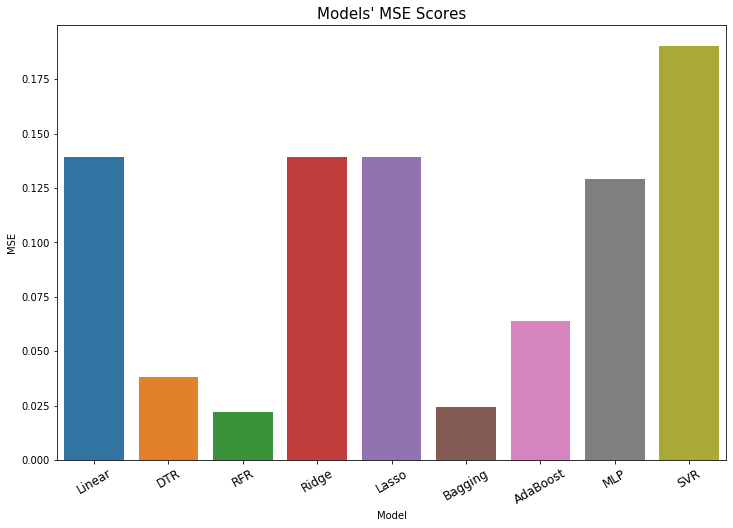

In [39]:
models = pd.DataFrame(columns=["Model","MSE","MAE","RMSE"],
                      data=[['Linear',0.1394252052289666,0.29068451845686016,0.37339684683854335],
                           ['DTR',0.03810052516993724,0.14092077356143157,0.19519355821834194],
                           ['RFR',0.02217149050525534,0.10886606504234475,0.14890094192198833],
                           ['Ridge', 0.13942517942902813,0.2906845931227855,0.37339681229093014],
                           ['Lasso',0.13942523502093512,0.2906864974355341,0.37339688673171223],
                           ['Bagging', 0.024117367778193642,0.11332062774568498,0.1552976747353084],
                           ['AdaBoost',0.06387660235200453,0.2138101447510924,0.25273820912557826],
                           ['MLP',0.12912465143895585,0.2773830200372923,0.35933918717411806],
                           ['SVR',0.1903603355962333,0.31436503969211466,0.43630303184396196]])
print(models)
models.sort_values(by="MSE")
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["MSE"])
plt.title("Models' MSE Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.show()        # the smaller, the better

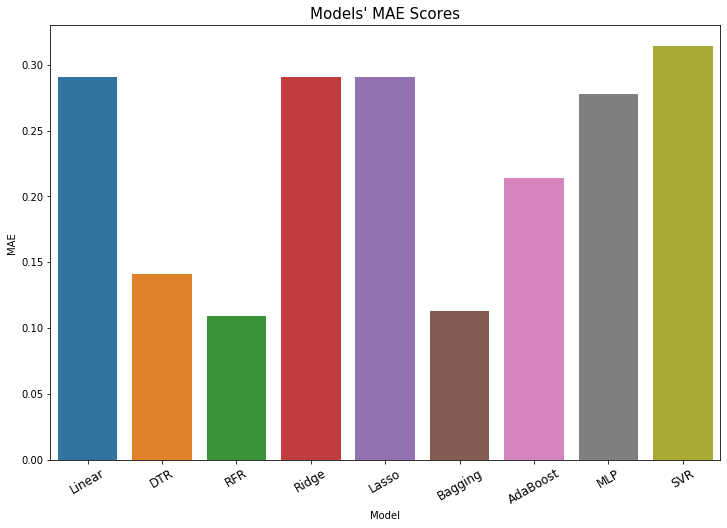

In [40]:
models.sort_values(by="MAE")
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["MAE"])
plt.title("Models' MAE Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

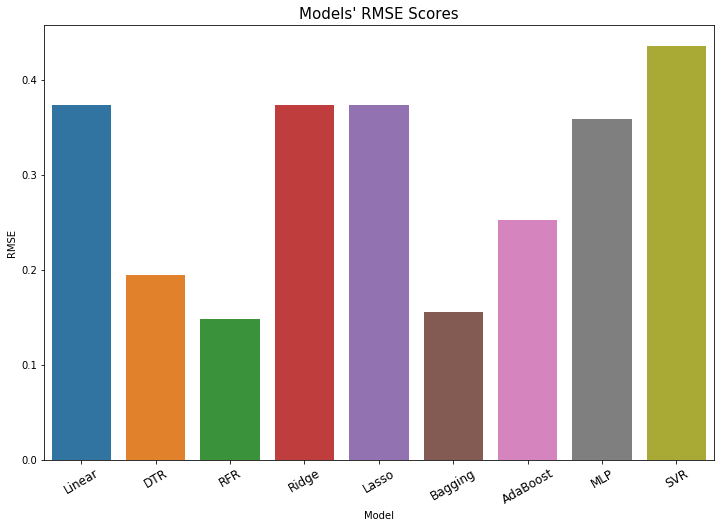

In [41]:
models.sort_values(by="RMSE")
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE"])
plt.title("Models' RMSE Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

## 5 Conclusions 

1.When we investigate the change in house prices over a year, the most relevant elements are latitude, DOM, Building age, longtitude and square, which is reasonable. 
2.The majority of the regression models we applied in this case has relatively small MSE, MAE and RMSE, which indicates that they fit well.
3.The models that performs best is the RandomForestRegressor. The reason may be:
1)RandomForestRegressor works well on large dataset and is able to work with missing data by creating an estimate for them.
2)RandomForestRegressor does not need a high level of feature engineering. 
3)RandomForestRegressor is an ensemble methods have regularization inbuilt and are robust to overfitting.
4.We selected over sixty thousand samples from 2016 for prediction and identify a significant raise, and the trend reached the highest point in December. We have several assumptions about this phenomenon:
1)Real estate policy: The government implemented a policy of "destocking" (e.g. lower down payment) to encourage people to buy houses. 
2)Quantitative easing: With the real economy weak, a lot of credit has flowed into real estate. 
3)Sharp contradiction between supply and demand in the real estate market: In the case of the real estate market recovery, land supply is engaged in "hunger marketing", on the one hand is the soaring price, on the other hand is the decline of land supply.

Future work: 
1.When checking the total price for each location, we clearly see some structures where the price is higher at the center of the 2D- distribution.The idea would be to calculate the distance for each home to the center and associate a score.
2.We may try backward selection in the feature selection part.

## 6 Individual Contribution 
Introduction-Yifei,
Background-Xiaoran,
Data processing-Jiayang,
Forward stepwise selection-Xiaoran&Yifei,
Models(DecisionTree,LinearRegression,RandomForest)-Yifei,
Models(Ridge,Lasso,Bagging)-Xiaoran,
Models(AdaBoost,MLP,SVR)-Jiayang,
Model comparison-Jiayang
Conclusion-Jiayang&Yifei&Xiaoran
Debug-Xiaoran&Jiayang&Yifei

## References

VarunSonavni. (2021b, November 13). How to Predict the Price of a House in Real Estate Using Data Science. Medium. https://python.plainenglish.io/data-science-project-real-estate-house-price-prediction-website-df71ac98a132;

Business, R. M., CNN. (2021, November 9). Zillow’s home-buying debacle shows how hard it is to use AI to value real estate. CNN. https://www.cnn.com/2021/11/09/tech/zillow-ibuying-home-zestimate/index.html;

House Price Prediction using Machine Learning in Python. (2022, September 7). GeeksforGeeks. https://www.geeksforgeeks.org/house-price-prediction-using-machine-learning-in-python/;

Beijing Housing Prices Analysing and Predicting. (2018). Kaggle.com. https://www.kaggle.com/code/gavinmandias/beijing-housing-prices-analysing-and-predicting;

机器学习实战二：波士顿房价预测 Boston Housing - 未来我想陪你 - 博客园. (2021, May 13). Www.cnblogs.com. https://www.cnblogs.com/wish-together/p/14764148.html#%E6%B4%BB%E5%8A%A8%E8%83%8C%E6%99%AF;

sklearn.preprocessing.StandardScaler https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html;

lecture notes from Prof Zuchuan